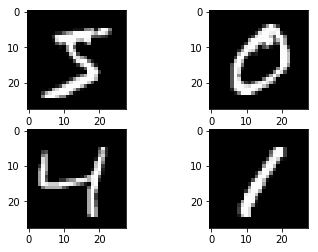

(28, 28)

In [9]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
X_train[0].shape

In [10]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [12]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [13]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [14]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [15]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2792 - acc: 0.9209 - val_loss: 0.1418 - val_acc: 0.9571
Epoch 2/10
 - 6s - loss: 0.1117 - acc: 0.9674 - val_loss: 0.0926 - val_acc: 0.9710
Epoch 3/10
 - 5s - loss: 0.0718 - acc: 0.9793 - val_loss: 0.0782 - val_acc: 0.9776
Epoch 4/10
 - 6s - loss: 0.0502 - acc: 0.9857 - val_loss: 0.0744 - val_acc: 0.9767
Epoch 5/10
 - 5s - loss: 0.0372 - acc: 0.9893 - val_loss: 0.0671 - val_acc: 0.9789
Epoch 6/10
 - 5s - loss: 0.0268 - acc: 0.9931 - val_loss: 0.0628 - val_acc: 0.9801
Epoch 7/10
 - 6s - loss: 0.0208 - acc: 0.9947 - val_loss: 0.0631 - val_acc: 0.9809
Epoch 8/10
 - 5s - loss: 0.0141 - acc: 0.9967 - val_loss: 0.0629 - val_acc: 0.9804
Epoch 9/10
 - 5s - loss: 0.0108 - acc: 0.9977 - val_loss: 0.0611 - val_acc: 0.9814
Epoch 10/10
 - 6s - loss: 0.0082 - acc: 0.9984 - val_loss: 0.0583 - val_acc: 0.9807
Baseline Error: 1.93%


In [22]:
model2 = baseline_model()
for i in range(1000):
    idx = numpy.random.randint(X_train.shape[0])
    X_train_part, y_train_part = X_train[idx], y_train[idx]
    model2.fit(X_train_part, y_train_part, validation_data=(X_test, y_test), epochs=1, batch_size=1, verbose=2)
    if i % 100 == 0:
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("Baseline Error: %.2f%%" % (100-scores[1]*100))

ValueError: Error when checking input: expected dense_11_input to have shape (784,) but got array with shape (1,)